### unit11 대중교통 데이터 시각화하기
#### 서울지하철 유/무임 승차데이터(t-money 데이터)

- 문제1.유임 승차 비율이 가장 높은 역은 어디일까?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('subwayfee.csv', encoding='cp949')
df.shape

(597, 9)

In [14]:
df = df.replace(',','', regex=True)
df.dropna() # 누락값이 있는 행은 버린다.
df.head(1)

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
0,2019-05,1호선,150,서울역,1568570,1489737,247801,242107,2019-06-03 10:56:20


In [13]:
df.head()

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
0,2019-05,1호선,150,서울역,1568570,1489737,247801,242107,2019-06-03 10:56:20
1,2019-05,1호선,151,시청,709821,727110,112279,112016,2019-06-03 10:56:20
2,2019-05,1호선,152,종각,1204910,1151371,176083,164915,2019-06-03 10:56:20
3,2019-05,1호선,153,종로3가,699000,647664,408682,382809,2019-06-03 10:56:20
4,2019-05,1호선,154,종로5가,561662,578374,307515,295535,2019-06-03 10:56:20


In [10]:
arr = np.array(df) # 배열로 변환
arr.shape, arr[0]

((597, 9), array(['2019-05', '1호선', 150, '서울역', '1568570', '1489737', '247801',
        '242107', '2019-06-03 10:56:20'], dtype=object))

In [20]:
유임승차 = (arr[:, 4]).astype(np.int)
station = arr[np.argmax(유임승차)]
station[3], np.max(유임승차), np.argmax(유임승차)

('강남', 2894341, 31)

유임 승차 비율이 가장 높은 곳은? => 유임승차인원/무임승차인원

In [27]:
무임승차 = (arr[:, 6]).astype(np.int)
유임승차비율 = 유임승차/(무임승차+1)
arr[np.argmax(유임승차비율), 1:4:2], np.max(유임승차비율), np.argmax(유임승차비율)

(array(['분당선', '복정'], dtype=object), 24.0, 237)

- 문제2.유무임 승하차 인원이 가장 많은 역은 어디일까

In [39]:
전체승하차인원 = arr[:,4:8].astype(np.int)
전체승하차인원

array([[1568570, 1489737,  247801,  242107],
       [ 709821,  727110,  112279,  112016],
       [1204910, 1151371,  176083,  164915],
       ...,
       [  87982,  103574,   34415,   32373],
       [  35939,   36973,   17275,   17703],
       [  42076,   44785,   23061,   20860]])

In [49]:
역이용인원 = np.sum(전체승하차인원, axis=1)
역이용인원
arr[np.argmax(역이용인원), 1:4:2], np.max(역이용인원), np.argmax(역이용인원)

(array(['2호선', '강남'], dtype=object), 6234453, 31)

무임 승하차 인원이 가장 많은 역은 어디일까

In [51]:
전체무임승하차인원 = arr[:,6:8].astype(np.int)
역무임이용인원 = np.sum(전체무임승하차인원, axis=1)
역무임이용인원
arr[np.argmax(역무임이용인원), 1:4:2], np.max(역무임이용인원), np.argmax(역무임이용인원)

(array(['1호선', '종로3가'], dtype=object), 791491, 3)

- 문제3.모든 역의 유무임 승하차 비율은 어떻게 될까 > 파이(유임승차 45%, 무임하차 x%)

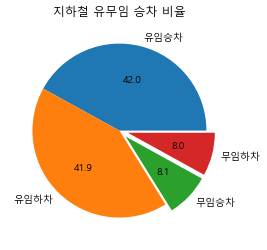

In [58]:
a = np.sum(arr[:, 4:8].astype(np.int), axis=0)
plt.rc('font', family = 'Malgun Gothic')
n = plt.pie(a, labels=df.columns[4:8], autopct='%.1f', explode=[0,0,0.1,0.1])
plt.title('지하철 유무임 승차 비율')
plt.savefig('all_subway_ratio.png')

- 문제3.모든 역마다 유무임 승차 비율을 따로 파이 차트로 나타내기(50만명 이상 승차하는 곳만)

In [69]:
for i in range(len(arr)):
    row = arr[i]
    승하차인원 = row[4:8].astype(np.int)
    유임승차 = 승하차인원[0]
    if 유임승차 > 1500000:
        print(row)
        plt.rc('font', family = 'Malgun Gothic')
        n = plt.pie(row[4:8], labels=df.columns[4:8], autopct='%.1f', explode=[0,0,0.1,0.1])
        역이름 = row[3]
        파일명 = 'subway_'+ 역이름 + '.png'
        plt.title(역이름+'역의 유무임 승차 비율')
        plt.savefig(파일명)
        plt.close()
        #plt.savefig('all_subway_ratio.png')

['2019-05' '1호선' 150 '서울역' '1568570' '1489737' '247801' '242107'
 '2019-06-03 10:56:20']
['2019-05' '2호선' 216 '잠실(송파구청)' '2539574' '2462479' '233044' '219947'
 '2019-06-03 10:56:20']
['2019-05' '2호선' 219 '삼성(무역센터)' '1781824' '1842623' '134802' '127716'
 '2019-06-03 10:56:20']
['2019-05' '2호선' 222 '강남' '2894341' '2974378' '192979' '172755'
 '2019-06-03 10:56:20']
['2019-05' '2호선' 228 '서울대입구(관악구청)' '1509438' '1455697' '222610' '213945'
 '2019-06-03 10:56:20']
['2019-05' '2호선' 230 '신림' '1996054' '1926203' '266618' '270264'
 '2019-06-03 10:56:20']
['2019-05' '2호선' 232 '구로디지털단지' '1810723' '1808076' '194678' '197938'
 '2019-06-03 10:56:20']
['2019-05' '2호선' 234 '신도림' '1646558' '1650521' '234895' '223466'
 '2019-06-03 10:56:20']
['2019-05' '2호선' 239 '홍대입구' '2477631' '2672677' '122634' '119350'
 '2019-06-03 10:56:20']
['2019-05' '3호선' 329 '고속터미널' '1776023' '1683057' '210770' '201605'
 '2019-06-03 10:56:20']


### unit12 지하철 시간대별 데이터 시각화하기

In [76]:
df = pd.read_excel('2019년 05월  교통카드 통계자료.xls', sheet_name=3, encoding='cp949')
df.shape

(598, 53)

In [77]:
df.head(2)

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,...,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51,작업일시
0,NaN,NaN,NaN,NaN,승차,하차,승차,하차,승차,하차,...,하차,승차,하차,승차,하차,승차,하차,승차,하차,NaN
1,2019-05,1호선,150.0,서울역,"1,148",21,"11,958","10,579","15,684","61,286",...,"22,083","4,127","7,762",3,548,0,0,0,0,2019-06-03 10:56:25


In [78]:
df0 = df.drop(0)

In [80]:
df.head(2)

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,...,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51,작업일시
0,NaN,NaN,NaN,NaN,승차,하차,승차,하차,승차,하차,...,하차,승차,하차,승차,하차,승차,하차,승차,하차,NaN
1,2019-05,1호선,150.0,서울역,"1,148",21,"11,958","10,579","15,684","61,286",...,"22,083","4,127","7,762",3,548,0,0,0,0,2019-06-03 10:56:25


출근시간대에 사람들이 (가장) 많이 타고 내리는 역은 어딜까
 - 출근 시간대는 언제인가? : 새벽~오전9시
 - 상위 10개 역 : 정력해서 큰 숫자 10개를 자른다(mask로 조건부 검색)
 - 타는 역/ 내리는 역

<BarContainer object of 2 artists>

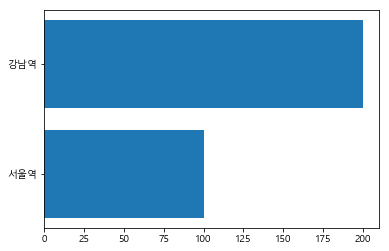

In [82]:
plt.barh(['서울역','강남역'], [100,200])

In [101]:
출근시간시작위치 = 4
출근시간끝위치 = 13
df0 = df0.replace(',','',regex=True)
arr = np.array(df0)
arr.shape
역이름 = arr[:,3]
역별승차인원 = arr[:, 출근시간시작위치:출근시간끝위치:2].astype(np.int)
역별하차인원 = arr[:, 1+출근시간시작위치:1+출근시간끝위치:2].astype(np.int)
역별승차인원[0], 역별하차인원[0]

(array([ 1148, 11958, 15684, 44585, 89357]),
 array([    21,  10579,  61286, 115354, 238583]))

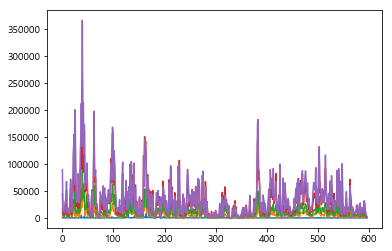

In [88]:
m = plt.plot(역별승차인원)

In [102]:
역별승차인원합 = np.sum(역별승차인원, axis=1)
역별하차인원합 = np.sum(역별하차인원, axis=1)
역별승차인원합[0], 역별하차인원합[0]

(162732, 425823)

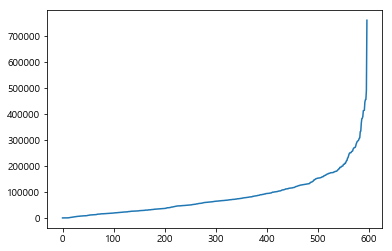

In [103]:
m = plt.plot(np.sort(역별승차인원합))

In [104]:
k=10
threshold = np.sort(역별승차인원합)[-k] # 기준값
threshold

382801

In [106]:
mask = 역별승차인원합 >= threshold
역별승차인원합[mask], 역이름[mask]

(array([412219, 454340, 759642, 490300, 444523, 454963, 412919, 382801,
        389612, 413462]),
 array(['잠실(송파구청)', '서울대입구(관악구청)', '신림', '구로디지털단지', '신도림', '연신내', '쌍문',
        '수유(강북구청)', '화곡', '까치산'], dtype=object))

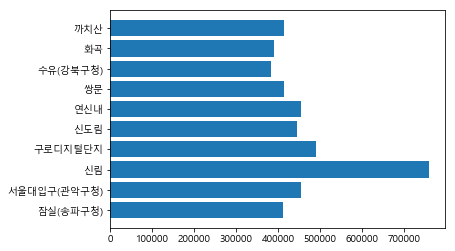

In [110]:
m = plt.barh(역이름[mask], 역별승차인원합[mask])

- 밤 11시에 사람들이 가장 많이 타는 역은 어디일까요?

In [136]:
가장많이타는역 = arr[:,-11].astype(np.int)
#가장많이타는역[0]
arr[np.argmax(가장많이타는역), 3:4:2], np.max(가장많이타는역), np.argmax(가장많이타는역)
#arr[np.argmax(역무임이용인원), 1:4:2]

(array(['홍대입구'], dtype=object), 151504, 48)

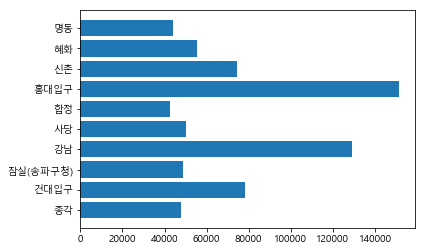

In [138]:
밤11시위치 = -11
밤11시승차인원 = arr[:,밤11시위치].astype(np.int)
threshold = np.sort(밤11시승차인원)[-k] # 기준값
mask = 밤11시승차인원 >= threshold

m = plt.barh(역이름[mask], 밤11시승차인원[mask])